In [14]:
import zipfile

path_to_zip = '/content/default+of+credit+card+clients.zip'
dir_to_extract = '/content'

# Unzip the file
with zipfile.ZipFile(path_to_zip, 'r') as zip_ref:
    zip_ref.extractall(dir_to_extract)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.compose import ColumnTransformer

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [3]:
df = pd.read_excel('/kaggle/input/credit-card/default of credit card clients.xls', header=1)

df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

<Axes: >

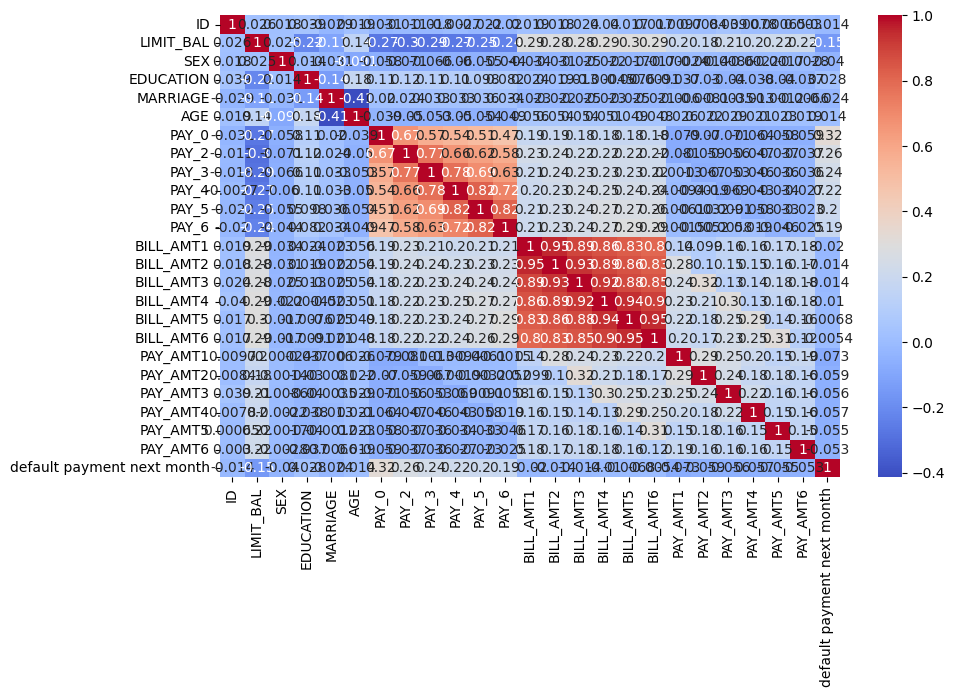

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True,  cmap="coolwarm")

# Check & Handle Multicolinearity

In [6]:


X = df.select_dtypes(include=np.number)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                       Feature        VIF
0                           ID   3.901483
1                    LIMIT_BAL   4.046691
2                          SEX   9.257822
3                    EDUCATION   6.798290
4                     MARRIAGE   6.457641
5                          AGE  11.400140
6                        PAY_0   1.997811
7                        PAY_2   3.216889
8                        PAY_3   3.730003
9                        PAY_4   4.445615
10                       PAY_5   4.990164
11                       PAY_6   3.463893
12                   BILL_AMT1  20.844042
13                   BILL_AMT2  38.228082
14                   BILL_AMT3  31.783330
15                   BILL_AMT4  29.699788
16                   BILL_AMT5  36.078613
17                   BILL_AMT6  21.427596
18                    PAY_AMT1   1.908606
19                    PAY_AMT2   2.385670
20                    PAY_AMT3   1.911829
21                    PAY_AMT4   1.807558
22                    PAY_AMT5   1

In [7]:
# calculating avg billing of month for one person
df["BILL_AVG"] = df[["BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"]].mean(axis=1)

df = df.drop(columns=["BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6", "ID"])




In [8]:
# check multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

X = df.select_dtypes(include=np.number)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                       Feature        VIF
0                    LIMIT_BAL   4.021388
1                          SEX   9.089108
2                    EDUCATION   6.710904
3                     MARRIAGE   6.282768
4                          AGE  11.051137
5                        PAY_0   1.995312
6                        PAY_2   3.191273
7                        PAY_3   3.707875
8                        PAY_4   4.427951
9                        PAY_5   4.963679
10                       PAY_6   3.408944
11                    PAY_AMT1   1.359109
12                    PAY_AMT2   1.263201
13                    PAY_AMT3   1.300577
14                    PAY_AMT4   1.256214
15                    PAY_AMT5   1.221060
16                    PAY_AMT6   1.204404
17  default payment next month   1.449020
18                    BILL_AVG   2.204568


## Check & Handle Embalance Dataset

In [9]:
df['default payment next month'].value_counts()

default payment next month
0    23364
1     6636
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7931248676e0>,
 [Text(-0.8449152724437756, 0.7043565733286378, 'non-payment'),
  Text(0.844915501952234, -0.7043562980202597, 'payment')],
 [Text(-0.460862875878423, 0.3841944945428933, '78%'),
  Text(0.4608630010648548, -0.384194344374687, '22%')])

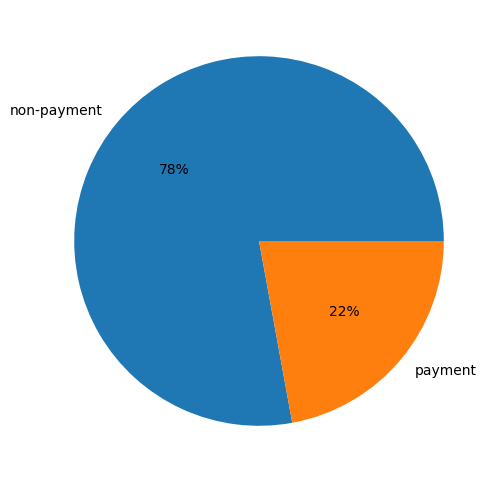

In [10]:
labels = ['non-payment','payment']
values = df['default payment next month'].value_counts()

plt.figure(figsize=(10,6))
plt.pie( values, labels=labels, autopct="%.0f%%")

In [11]:
# Apply SMOTE
from imblearn.over_sampling import SMOTE

X = df.drop("default payment next month", axis=1)
y = df["default payment next month"]

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [12]:
y.value_counts()

default payment next month
1    23364
0    23364
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x79311deafb60>,
 [Text(-4.8082529002048655e-08, 1.099999999999999, 'non-payment'),
  Text(1.311736850028664e-08, -1.0999999999999999, 'payment')],
 [Text(-2.6226834001117445e-08, 0.5999999999999994, '50%'),
  Text(7.1549282728836204e-09, -0.5999999999999999, '50%')])

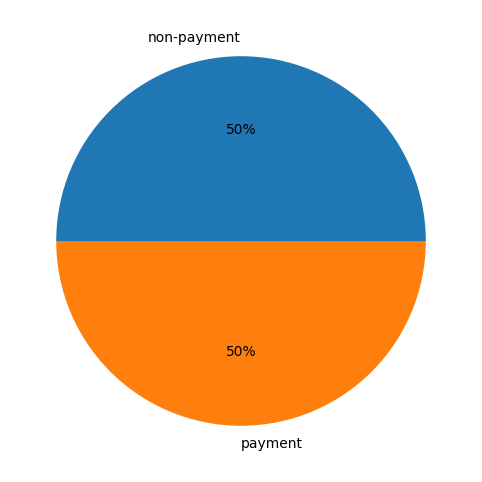

In [13]:
labels = ['non-payment','payment']
values = y.value_counts()

plt.figure(figsize=(10,6))
plt.pie( values, labels=labels, autopct="%.0f%%")

# Creating Pipeline

In [14]:
# all columns are numerical so no need to use any encoder here

num_pipeline = Pipeline(steps=[
    ("scale", StandardScaler()),
    ('transformation', PowerTransformer())
])

preprocessor = ColumnTransformer([
    ("num_pipeline", num_pipeline, X.columns)
])

In [15]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,BILL_AVG
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,0,689,0,0,0,0,1284.000000
1,120000,2,2,2,26,-1,2,0,0,0,2,0,1000,1000,1000,0,2000,2846.166667
2,90000,2,2,2,34,0,0,0,0,0,0,1518,1500,1000,1000,1000,5000,16942.166667
3,50000,2,2,1,37,0,0,0,0,0,0,2000,2019,1200,1100,1069,1000,38555.666667
4,50000,1,2,1,57,-1,0,-1,0,0,0,2000,36681,10000,9000,689,679,18223.166667


In [16]:
X_train, X_test , y_train, y_test = train_test_split( X, y, test_size=0.25, random_state= 42)


In [17]:

class MachineLearning:

  @staticmethod
  def modelling_without_tuning(X, y, preprocessor):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    res={}
    models = [
            LogisticRegression(max_iter=1000),
            DecisionTreeClassifier(),
            RandomForestClassifier(),
            SVC()
        ]
    for model in models:
            pipe = Pipeline([
                ("preprocessor", preprocessor),
                ("model", model)
            ])

            pipe.fit(X_train, y_train)
            y_pred = pipe.predict(X_test)

            model_name = type(model).__name__

            res[model_name] = {
                "accuracy": accuracy_score(y_test, y_pred),
                "f1_score":f1_score(y_pred, y_test ,average="macro"),
                "recall":recall_score(y_pred, y_test, average="macro"),
                "precision":precision_score(y_pred, y_test, average="macro")
            }

    return res


  @staticmethod
  def modelling_with_tuning(X, y, preprocessor):

    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42 )

    results = {}

    models_and_params = {

            "SupportVectorClassifier":(
                SVC(random_state=42),
                {
                    "model__C":[0.01, 0.1, 1, 10, 100],
                    "model__kernel": ['linear', 'rbf'],
                    'model__gamma': ['scale', 0.01, 0.001],

                }
            )
        }

    scoring = "accuracy"

    # ---------------- COMMON LOOP ----------------
    for model_name, (model, param_grid) in models_and_params.items():

        pipeline = Pipeline([
            ("preprocessor", preprocessor),
            ("model", model)
        ])

        grid = GridSearchCV(
            pipeline,
            param_grid,
            cv=5,
            scoring=scoring,
            n_jobs=-1
        )

        grid.fit(X_train, y_train)

        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_test)

        results[model_name] = {
                "best_params": grid.best_params_,
                "cv_best_score": grid.best_score_,
                "accuracy": accuracy_score(y_test, y_pred),
                "f1_score":f1_score(y_pred, y_test ,average="macro"),
                "recall":recall_score(y_pred, y_test, average="macro"),
                "precision":precision_score(y_pred, y_test, average="macro")

            }

    return results




## Modelling without tuning

In [18]:
import pprint
ml = MachineLearning()

results = ml.modelling_without_tuning(X, y, preprocessor)

In [19]:
from pprint import pprint

pprint(results)

{'DecisionTreeClassifier': {'accuracy': 0.7428846565375562,
                            'f1_score': 0.7428401153397644,
                            'precision': 0.7428620650745932,
                            'recall': 0.7430057863539079},
 'LogisticRegression': {'accuracy': 0.7211641343890435,
                        'f1_score': 0.7211638151635416,
                        'precision': 0.7211688701592831,
                        'recall': 0.7211717061032668},
 'RandomForestClassifier': {'accuracy': 0.8293387545473999,
                            'f1_score': 0.829243274899018,
                            'precision': 0.8293873731227144,
                            'recall': 0.8301860275709328},
 'SVC': {'accuracy': 0.7664241386689493,
         'f1_score': 0.7662981504130548,
         'precision': 0.7664716995786205,
         'recall': 0.7670954403300161}}


## Modelling with Hyperparameter tuning

In [ ]:
results2 =  ml.modelling_with_tuning(X, y,preprocessor)

In [ ]:
pprint(results2)